<a href="https://colab.research.google.com/github/itforankit/GenerativeAI/blob/main/autoencoder_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#generate the data whcih look like mnist dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
import numpy as np

**Autoencoder:**

What and Why?

Type of neural netowrk designed for unsupervised learning

**encoder:** learn the compresses representation of input data
input=28*28=784
Compressed=10*10=100

No of nuerons in o/p layer of the above ?
Ans: 100

**Decoder:**
Reconstruct original data from the compresses presentation

as per abpve example willl take compressed verion which is with 100 and will reconstruct with 784.

Gen AI: Autoencoder it is generating new samples which have similiar characterstics to the orignial data

Train NN to identify -> cat or dog -> supevised learning - labelled

Autoencoder (encoder -> learning the attributes)

Applications of Autoencoders:

1. Data Augmentation: Genrate more data for training the AI models
2. Anomoly Detection: train the model on normal data (learned weights using normal data)
   
   unormal data -> reconstruct -> reconstrcution error is higher
3. Style transfer: night scenes

  Day Scenes
4. Image or data Synthesis: genrating realistic images


In [2]:
# read the data
#encode the data to lower dimension(latent space)
# train to reconstruct
# output of the decoder

(X_train,_),(X_test,_)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train=X_train.astype('float')/255
X_test=X_test.astype('float')/255

In [4]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [5]:
encoding_dim =32 #can be any number
input_img=Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

In [6]:
autoencoder=Model(input_img,decoded)

In [7]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

# crossentropy : calculate the diff btw actual and predicted value
# y-actual = [0,0.4,1]
#y_pred =[1,0.6,1]
#crossEnt = -y_actual(sum(log(y_pred_i)))

In [9]:
autoencoder.fit(X_train, X_train,epochs=50, batch_size=100, shuffle=True, validation_data=(X_test,X_test))

Epoch 1/50
600/600 [==============================] - 5s 5ms/step - loss: 0.2135 - val_loss: 0.1495
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1332 - val_loss: 0.1187
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1130 - val_loss: 0.1058
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1034 - val_loss: 0.0992
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0984 - val_loss: 0.0957
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0961 - val_loss: 0.0941
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0951 - val_loss: 0.0935
Epoch 8/50
600/600 [==============================] - 2s 4ms/step - loss: 0.0945 - val_loss: 0.0932
Epoch 9/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0942 - val_loss: 0.0928
Epoch 10/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0940 - val_loss: 0.0926

In [10]:
reconstructed_image=autoencoder.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [11]:
import matplotlib.pyplot as plt


In [17]:
reconstructed_image[5].reshape(28,28)

array([[4.83657503e-10, 3.64139385e-10, 1.74480888e-10, 2.29309280e-10,
        6.92239044e-11, 1.59947847e-10, 5.25769872e-10, 8.30989583e-11,
        1.40728457e-10, 1.30161992e-10, 1.86053756e-10, 8.26569785e-11,
        3.48026896e-09, 4.52497137e-11, 1.82272097e-11, 3.55192475e-09,
        1.54941934e-10, 1.94555441e-10, 1.69501496e-10, 1.61761965e-10,
        7.26658178e-11, 1.33408659e-10, 3.10501097e-10, 2.19239113e-10,
        1.66831285e-10, 2.14820328e-10, 7.11316006e-11, 8.90617441e-11],
       [1.52692303e-10, 5.91371230e-10, 3.03158526e-10, 2.44274961e-10,
        1.96510541e-09, 2.56642441e-09, 5.65241291e-11, 1.71179426e-08,
        1.44073397e-06, 5.45382591e-07, 8.42659844e-08, 2.06141806e-08,
        5.76833137e-10, 4.90697651e-08, 1.37354584e-06, 4.28790770e-07,
        3.69262310e-08, 4.53622501e-10, 2.47218299e-08, 8.39881442e-10,
        3.75855613e-09, 5.45267031e-16, 3.28047900e-09, 7.67117980e-10,
        5.05636366e-11, 4.35193215e-10, 2.44879061e-10, 1.04103

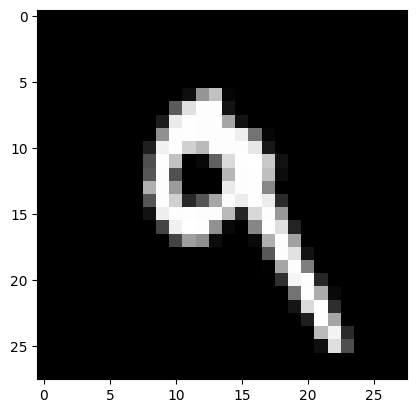

In [23]:
plt.imshow(X_test[7].reshape(28,28))
plt.gray()

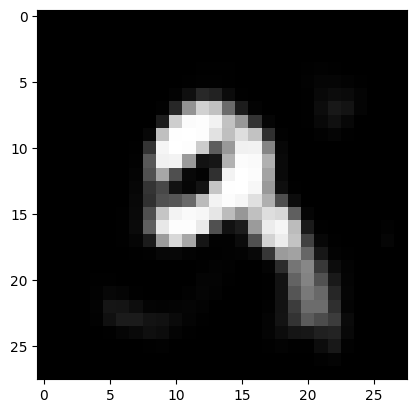

In [24]:
plt.imshow(reconstructed_image[7].reshape(28,28))
plt.gray()